<a href="https://colab.research.google.com/github/kframbroUmich/CSC302/blob/main/kframbro_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please see examples we did in class. Questions are just variations of what we did earlier.

**Q1**. Please read WorldCupMatches.csv to a data frame to proceed

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/DATA/WorldCupMatches.csv')



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q2** Using seaborn's displot draw density curves to show the distributions of Home Team Goals for every year.

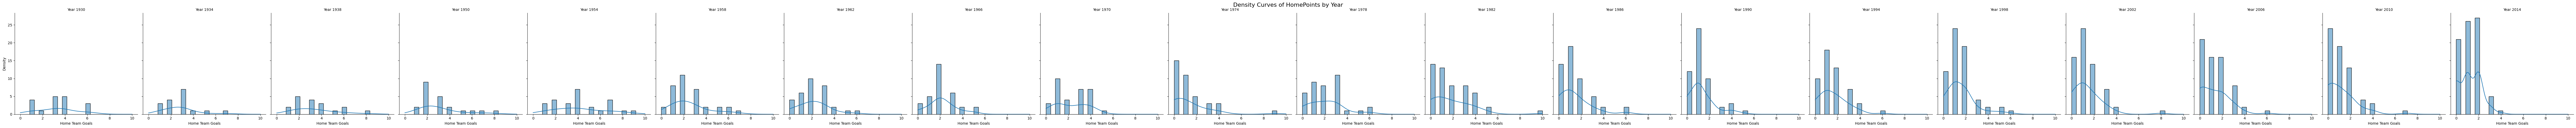

In [6]:
g=sns.displot(data=df, x='Home Team Goals', col='Year', kde=True, fill=True)
g.set_axis_labels("Home Team Goals", "Density")
g.set_titles("Year {col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Density Curves of HomePoints by Year", fontsize=16)


plt.show()

**Q3** Draw violin plots to summarize Home Team Goals distributions for each year by using seaborn. Notice that labels are really cluttered. Then please refer to the earlier notebooks to have labels to appear on only select years which end with 0. You can use ax handle to call ax.set_xticklables(labels) for the labels your prepared.

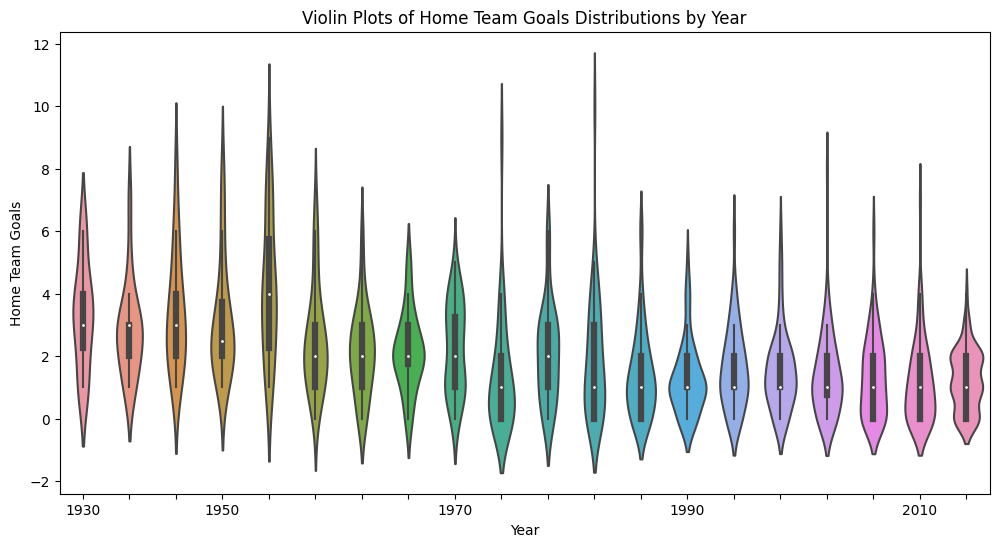

In [7]:
plt.figure(figsize=(12, 6))
g = sns.violinplot(data=df, x='Year', y='Home Team Goals')
y = df['Year'].unique()[df['Year'].unique() % 10 == 0]
g.set_xticks(range(len(df['Year'].unique())))
g.set_xticklabels([str(year) if year in y else '' for year in df['Year'].unique()])
plt.xlabel("Year")
plt.ylabel("Home Team Goals")
plt.title("Violin Plots of Home Team Goals Distributions by Year")

plt.show()



**Q4** Please install joypy. Then visualize distributions for Home Team Goals and Away Team Goals' for each year. Once you visualize, please add  plt.style.use('seaborn-white') to see how colors change in your second run. Please also add the legend which you can find from the function prototype.



In [8]:
!pip install joypy

<ipython-input-10-da1fda44d321>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


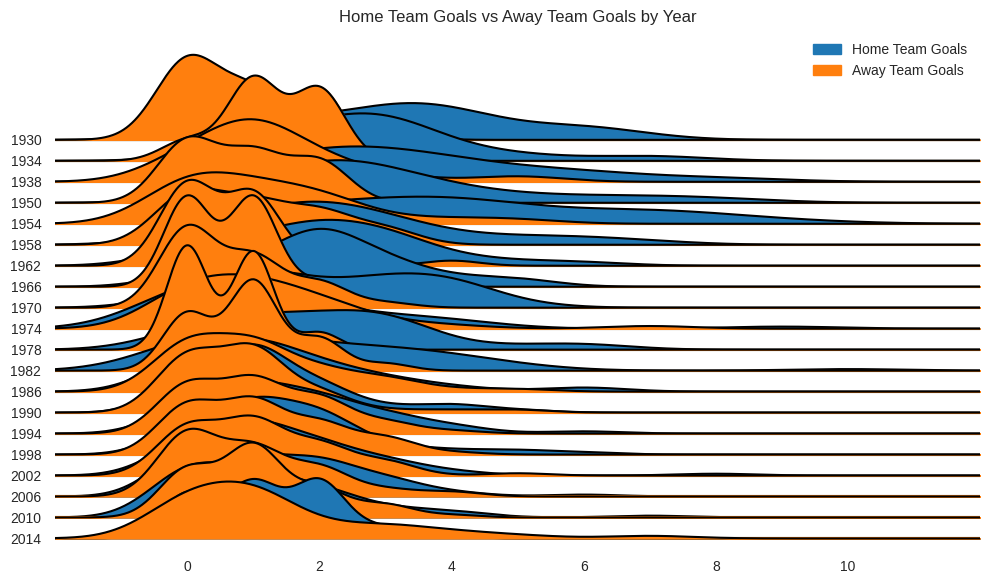

In [10]:
import joypy as jp
data = df[['Year','Home Team Goals','Away Team Goals']]
fix, axes = jp.joyplot(data,by='Year',overlap=2,
                       legend=True,
                       figsize=(10,6),
                       title="Home Team Goals vs Away Team Goals by Year")
plt.style.use('seaborn-white')
plt.show()

**Q5** Please use groupby function on Home Team Initials to see the sum of Home Team Goals which can be saved to another data frame by adding .reset_index() end the end of your line.

Then use your new data frame to visualize those total Home Team Goals for your top 5 countries with a bar plot (You can use Home Team Initials). You can use use df.sort_values() function on your data frame by tweaking the ascending option.

Notice that your x-axis will be having country initials, and y-axis will show the total number of Home Team Goals.



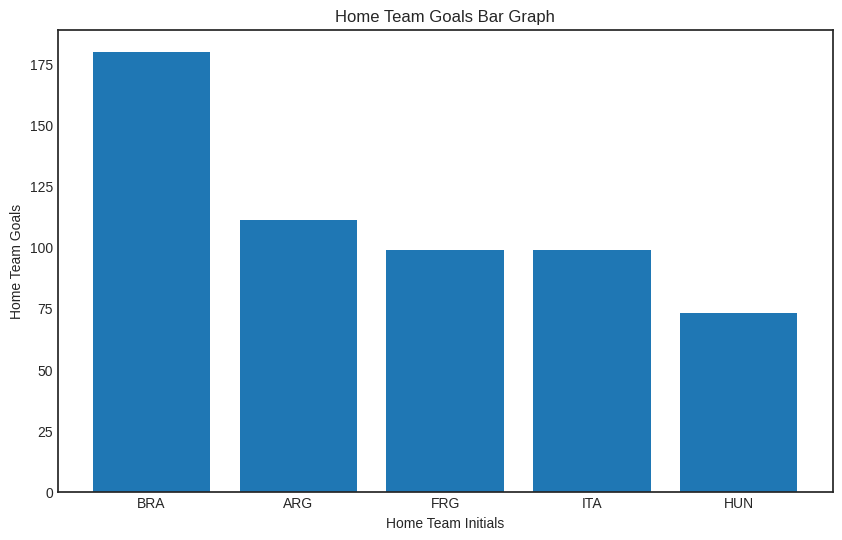

In [11]:
home_Team_df= df.groupby('Home Team Initials')[['Home Team Goals']].sum().reset_index()
home_Team_sorted_df=home_Team_df.sort_values(by='Home Team Goals',
                                             ascending=False).head(5)
plt.figure(figsize=(10, 6))
plt.bar(home_Team_sorted_df['Home Team Initials'],
        home_Team_sorted_df['Home Team Goals'])
plt.xlabel("Home Team Initials")
plt.ylabel("Home Team Goals")
plt.title("Home Team Goals Bar Graph")
plt.show()

**Q6** Please extract the rows for your top 4 countries (Home Team Initials') with the help of the previous question's answer. Then use joyplot again to visualize densities for 'Home Team Goals' and	'Away Team Goals' on the horizantal axis. Notice that your y-axis labels will be your country initials (Home Team Initials'). Make sure that your legend is visible and use 'dark_background' by calling plt.style.use again.



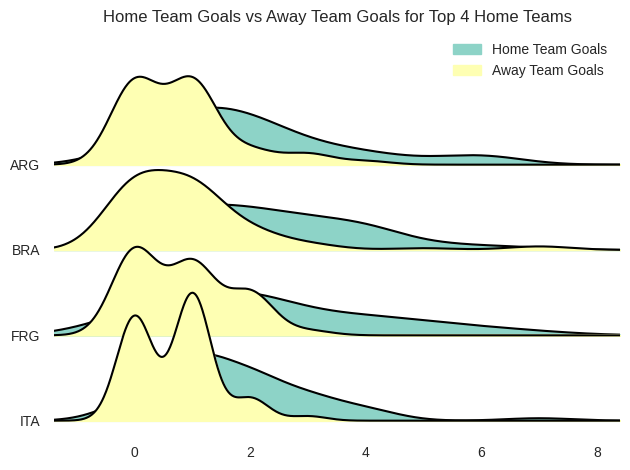

In [30]:
home_Team_top4=df.groupby('Home Team Initials')[['Home Team Goals','Away Team Goals']].sum().reset_index()
home_Team_top4=home_Team_top4.sort_values(by='Home Team Goals',
                                             ascending=False).head(4)
home_Team_df=pd.DataFrame(df[['Home Team Initials',
                              'Home Team Goals',
                              'Away Team Goals']])
home_team_top4_plot=home_Team_df[home_Team_df['Home Team Initials'].isin(home_Team_top4['Home Team Initials'])]
fix, axes = jp.joyplot(home_team_top4_plot,by='Home Team Initials',
                       legend=True,
                       title="Home Team Goals vs Away Team Goals for Top 4 Home Teams")
plt.style.use('dark_background')
plt.show()

**Q7** Please install seaborn_qqplot as shown below. Then draw a qqplot to compare probability distributions of Home Team Goals and Away Team Goals. Please comment on your finding. Do you think their distributions agree with each other? Please justify your answer by explaining the figure you obtained.

In [13]:
!pip install seaborn_qqplot

<ipython-input-29-bcd6bcfcb753>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


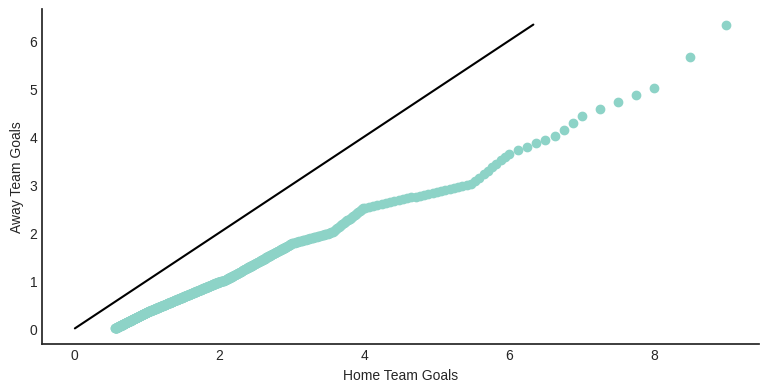

In [29]:
from seaborn_qqplot import pplot #seaborn-qqplot is a seaborn extension adding qqplots.
plt.style.use('seaborn-white')
pplot(df,x='Home Team Goals',y='Away Team Goals',kind='qq', display_kws={"identity":True}, height=4, aspect=2)
